# Algorithme Génétique

## Introduction

L'informatique théorique peut trouver son ispiration dans des nombreux domaines ; une place particulière possède des algorithmes déjà programmés par la nature comme c'est le cas pour les algorithmes génétiques. Or l'évolution optimise la survie des individus les mieux adaptés, on peut utiliser les principes dans un problème d'optimisation. 

Supposons que le génome d'un individu est composé de $n$ génes dont chacun peut avoir une valeur booléenne $\{−1,1\}$. On construit une population initiale et on l'évalue avec notre fonction de coût. On trie nos génomes d'après cette évaluation et on applique une mutation ou un croisement aléatoires sur les "pires" génomes de la population. On répète avec la nouvelle population. 

Rendu : code, réponses détaillées, illustrer les propos, docstring pas obligatoire, conclusions sur la convergence, etc.

## Marche aléatoire

Nous allons appliquer l’algorithme génétique à un problème assez simple. On modélise une marche aléatoire en dimension 1 sur T pas de temps, dans la direction d :
$x(t + 1) = x(t) + d$
avec d tiré uniformément sur le doublet $\{−1, 1\}$, et $t = \{0, . . . , T − 1\}$.

On cherche à optimiser la trajectoire de la marche de sorte à ce qu’elle reste dans un intervalle déterminé $[−r_0 ; r_0 ]$. Le paramètre $r_0$ sera à faire varier. Le coût d’une trajectoire sera égal au nombre de pas situés hors de
l’intervalle $[−r_0 ; r_0 ]$.

*Écrire une fonction qui génère aléatoirement un génome. Elle prend $T$, la longueur de la marche, en paramètre d’entrée et sort un vecteur de longueur $T$ prenant ses valeurs dans $\{−1, 1\}$ de façon aléatoire.*

In [57]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics as stats

In [2]:
def form_genome(T, d):
    res  = [0]*T
    for i in range(len(res)):
        rand = np.random.randn()
        if rand < 0:
            res[i] += d[0]
        if rand >= 0:
            res[i] += d[1]
    return res


form_genome(10, [-1,1])

[1, -1, -1, 1, 1, 1, 1, -1, -1, 1]

*Écrire la fonction qui calcule le coût d’un génome. Elle prend en paramètre d’entrée : un génome et $r_0$ , la borne de l’intervalle. Elle retourne un scalaire.*

In [71]:
def cost(genome, r0):
    price = 0
    for i in range(1,len(genome)+1):
        if sum(genome[:i]) < 0:
            if sum(genome[:i]) <= -r0:
                price += 1 # -sum(genome[:i]) - r0
        else :
            if sum(genome[:i]) >= r0:
                price += 1 # sum(genome[:i]) - r0
    return price

gen1 = form_genome(5, [-1,1])
print(gen1)
cost(gen1, 2)

[1, -1, -1, 1, -1]


0

## Codage de l’algorithme génétique

*Initialisation : écrire une fonction qui créée aléatoirement une population initiale de N génomes de taille $T$.*

In [4]:
def get_population(N, T):
    population = []
    for i in range(N):
        population.append(form_genome(T, [-1,1]))
    return population

get_population(10, 10)

[[1, 1, 1, -1, -1, 1, -1, -1, 1, -1],
 [-1, -1, -1, 1, -1, -1, 1, -1, -1, -1],
 [-1, -1, 1, -1, 1, 1, 1, -1, 1, 1],
 [-1, -1, 1, -1, 1, 1, -1, 1, 1, -1],
 [1, -1, -1, 1, -1, -1, -1, 1, 1, 1],
 [1, 1, -1, 1, 1, -1, 1, -1, 1, -1],
 [1, -1, 1, -1, -1, 1, 1, -1, 1, -1],
 [1, -1, 1, 1, -1, -1, -1, -1, 1, -1],
 [1, -1, -1, -1, 1, -1, 1, -1, 1, -1],
 [1, -1, 1, -1, -1, 1, 1, 1, 1, -1]]

*Écrire une fonction qui trie les génomes d’une population en fonction de leur coût. Indice : utiliser la fonction numpy.argsort().*

In [5]:
def sort_pop(pop, r0):
    cost_array = []
    for i in pop:
        cost_array.append(cost(i, r0))
    # print(cost_array)
    indexs = np.argsort(cost_array)
    # print(indexs)
    sorted_pop = []
    for i in range(len(indexs)):
        sorted_pop.append(pop[indexs[i]])
    return sorted_pop


my_pop = get_population(5, 5)
print(my_pop)
sort_pop(my_pop, 2)

[[1, 1, 1, 1, 1], [1, -1, -1, -1, 1], [-1, -1, -1, 1, -1], [1, 1, 1, -1, 1], [1, -1, -1, -1, 1]]


[[1, -1, -1, -1, 1],
 [1, -1, -1, -1, 1],
 [-1, -1, -1, 1, -1],
 [1, 1, 1, -1, 1],
 [1, 1, 1, 1, 1]]

*Écrire une fonction qui sélectionne les $N_s$ génomes ayant les valeurs de coût les plus importantes (sélection par rang). On prendra par exemple $N_s = N/2$. La valeur de sortie correspondra à la population à faire muter et/ou à croiser.*

In [6]:
def selection(pop, r0):
    return sort_pop(pop, r0)[(len(pop)//2):]

selection(my_pop, 2)

[[-1, -1, -1, 1, -1], [1, 1, 1, -1, 1], [1, 1, 1, 1, 1]]

*Nous allons maintenant procéder à la mutation des génomes sélectionnés. La mutation est définie par un taux $T_m$ qui correspond à la probabilité qu’un gène $a$ de muter. Il s’agit donc ici de parcourir les gènes de chaque génome et de les faire muter avec une probabilité $T_m$. Écrire la fonction qui permet d’effectuer cette mutation sur la population sélectionnée.*

In [7]:
def mut_genome(genome, Tm):
    new_genome = []
    for i in genome:
        rand = np.random.randn()
        if abs(rand) < Tm:
            new_genome.append(-i)
        else : 
            new_genome.append(i)
    return new_genome
            
def mut_pop(pop, Tm):
    new_pop = []
    for i in pop:
        new_pop.append(mut_genome(i, Tm))
    return new_pop

print(selection(my_pop, 2))
mut_pop(selection(my_pop, 2), 0.5)
            
            

[[-1, -1, -1, 1, -1], [1, 1, 1, -1, 1], [1, 1, 1, 1, 1]]


[[-1, -1, 1, 1, -1], [1, 1, -1, 1, 1], [1, 1, 1, 1, -1]]

*Nous allons maintenant effectuer le croisement de la population mutée. Le croisement se définit par un taux $T_c$ qui indique la probabilité avec laquelle un croisement entre génomes peut intervenir.
Coder la fonction qui effectue le croisement entre individus de la population sélectionnée avec la probabilité $T_c$. La position du croisement dans le génome, ainsi que l’individu avec lequel le croisement sera effectué seront tirés aléatoirement.*

In [63]:
def cross_over(pop, Tc):

    for i in range(len(pop)):
        g = pop[i]
        if random.random() > Tc:
            pos = int(random.random()*len(g))
            sec_g = []
            r = 0
            while sec_g == [] or sec_g == g:
                r = int(random.random()*len(pop))
                sec_g = pop[r]
            #print('Crossing-over à la position ' + str(pos) +
             #    ' de ' + str(g) + ' et ' + str(sec_g))
            pop[i] = g[:pos] + sec_g[pos:]
            pop[r] = sec_g[:pos] + g[pos:]
            

my_sel = selection(my_pop, 2)
print(my_sel)
cross_over(my_sel, 0.5)
print(my_sel)

[[-1, -1, -1, 1, -1], [1, 1, 1, -1, 1], [1, 1, 1, 1, 1]]
[[-1, -1, -1, -1, 1], [1, 1, 1, 1, -1], [1, 1, 1, 1, 1]]


*Mettre à jour la population courante avec la population mutée et incrémenter le compteur de génération.*

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9


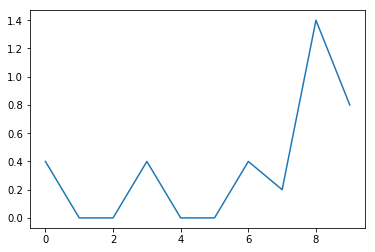

[[-1, 1, -1, 1, -1],
 [1, 1, 1, 1, -1],
 [1, -1, 1, 1, -1],
 [-1, 1, 1, -1, -1],
 [1, 1, -1, 1, -1]]

In [64]:
def evolve(N, T, r0, Tm, Tc, it):
    pop = get_population(N, T)
    costs_gener = []
    for i in range(it):
        print('Generation ' + str(i))
        #print(pop)
        sel = selection(pop, r0)
        #print(len(sel))
        changed_sel = mut_pop(sel, Tm)
        cross_over(changed_sel, Tc)
        pop = changed_sel + sort_pop(pop, r0)[:(len(pop)//2)]
        costs_gener.append(costs_pop(pop, r0)[0])
    #print(range(it), costs_gener)
    plt.plot(range(it), costs_gener)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')
    plt.show()
        
    return pop
        
evolve(5, 5, 2, 0.5, 0.5, 10)
    

*Calculer le coût moyen de la nouvelle population, ainsi que le coût minimum obtenu.*

In [65]:
def costs_pop(pop, r0):
    costs = []
    for i in range(len(pop)):
        costs.append(cost(pop[i], r0))
    return (stats.mean(costs), min(costs), max(costs))

costs_pop(my_pop, 2)

(2, 0, 6)

*Quel(s) critère(s) d’arrêt utiliseriez-vous ? Faire tourner l’algorithme avec $T = 500$,  $r_0 = 4$, $N = 100$,
$T_m = 0.05$ et $T_c = 0.1$. Tracer l’évolution du coût moyen au fur et à mesure des générations.*

Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20
Generation 21
Generation 22
Generation 23
Generation 24
Generation 25
Generation 26
Generation 27
Generation 28
Generation 29
Generation 30
Generation 31
Generation 32
Generation 33
Generation 34
Generation 35
Generation 36
Generation 37
Generation 38
Generation 39
Generation 40
Generation 41
Generation 42
Generation 43
Generation 44
Generation 45
Generation 46
Generation 47
Generation 48
Generation 49
Generation 50
Generation 51
Generation 52
Generation 53
Generation 54
Generation 55
Generation 56
Generation 57
Generation 58
Generation 59
Generation 60
Generation 61
Generation 62
Generation 63
Generation 64
Generation 65
Generation 66
Generation 67
Generation 68
Generation 69
Generation 70
Generation 71
Ge

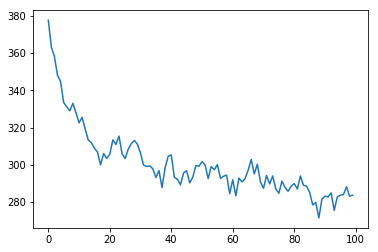

1

In [74]:
evolve(100, 500, 4, 0.05, 0.1, 100)
1

*Faire varier les paramètres suivants ($N$, $r_0$ , $T_m$ et $T_c$) pour étudier leur influence.*

*Décrire le comportement de l’algorithme (évolution des coûts moyen et minimum) et interpréter la convergence en fonction des paramètres utilisés.*

*Quelles différences remarquez-vous par rapport aux méthodes différentielles étudiées jusqu’à maintenant
(descente de gradient, Newton) ?*